## **House Price Prediction (Regression Basics)**

**Problem**
- Predict house prices based on features such as area, number of bedrooms, and location.

**Approach**
1. Used the **Ames Housing Dataset** (79 explanatory variables).
2. **Preprocessing**:

   * Handled missing values.
   * Encoded categorical features (Location, Neighborhood, etc.).
   * Scaled numerical features (area, square footage).
3. **Models**:

   * Started with **Linear Regression** for baseline.
   * Extended with **Random Forest Regressor** for non-linear relationships.
4. **Evaluation Metrics**:

   * **RMSE (Root Mean Squared Error)** for overall error.
   * **R² Score** for variance explained.

**Key Insights**

* **Linear Regression** works well for basic understanding.
* **Random Forest** significantly improved accuracy by handling non-linearities.
* Feature engineering (e.g., combining total area, overall quality) gave better predictions.

**Enterprise Use Case**

* Useful for **real-estate companies** and **property valuation** services.
* Can be deployed in **web apps** for instant house price estimation.
* Supports **buyers, sellers, and banks** in fair decision-making.


### 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Load Dataset

In [3]:
# Download from Kaggle: 'train.csv' from Ames Housing dataset
data = pd.read_csv("Data/House_Price/train.csv")

print("Dataset Preview:")
print(data.head())


Dataset Preview:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   

### 3. Feature Selection

In [4]:
# We'll select a subset of features for simplicity
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
            'TotalBsmtSF', 'FullBath', 'YearBuilt', 'Neighborhood']

X = data[features]
y = data['SalePrice']


### 4. Handle Missing Values

In [5]:
# For simplicity, drop rows with missing values in selected features
X = X.dropna()
y = y[X.index]


### 5. Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


### 6. Preprocessing

In [7]:
numeric_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
                    'TotalBsmtSF', 'FullBath', 'YearBuilt']
categorical_features = ['Neighborhood']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # avoid dummy trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### 7. Build Pipeline with Linear Regression

In [8]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])


### 8. Train Model

In [9]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### 9. Predictions & Evaluation

In [10]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Evaluation Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.2f}")



📊 Model Evaluation Metrics:
MAE  : 22188.49
RMSE : 36436.45
R²   : 0.83


### 10. Predict New Data Example

In [11]:
new_data = pd.DataFrame({
    'OverallQual': [7],
    'GrLivArea': [2000],
    'GarageCars': [2],
    'GarageArea': [500],
    'TotalBsmtSF': [1000],
    'FullBath': [2],
    'YearBuilt': [2005],
    'Neighborhood': ['NAmes']
})

predicted_price = model.predict(new_data)[0]
print(f"\n💰 Predicted Sale Price for new house: ${predicted_price:.2f}")


💰 Predicted Sale Price for new house: $220364.19


# 11. Visualization: Actual vs Predicted


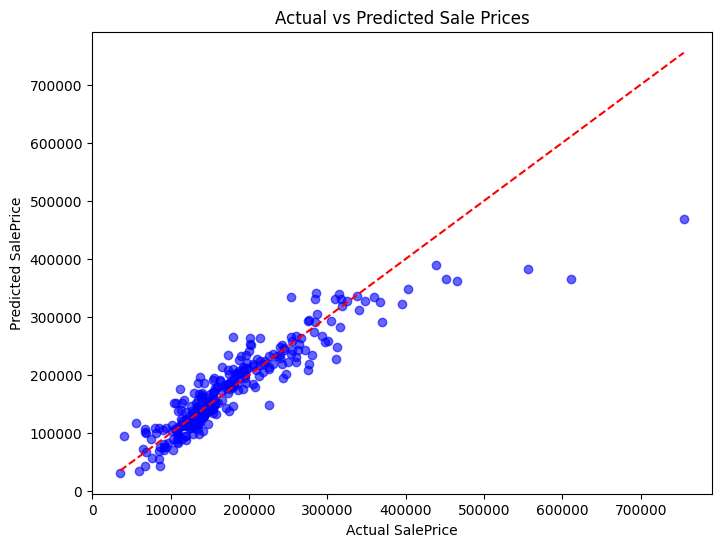

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, c='blue', alpha=0.6)
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Actual vs Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()